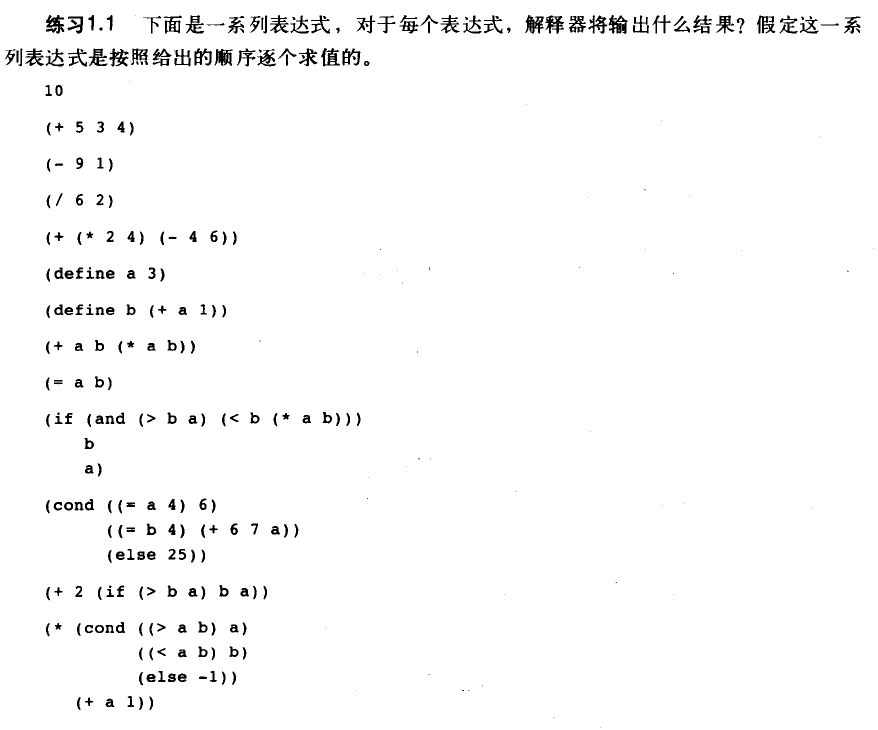

In [2]:
10

10

In [3]:
(+ 5 3 4)

12

In [4]:
(- 9 1)

8

In [5]:
(/ 6 2)

3

In [6]:
(+(* 2 4)(- 4 6))

6

In [7]:
(define a 3)

In [8]:
(define b (+ a 1))

In [10]:
(+ a b (* a b))

19

In [11]:
(= a b)

#f

In [12]:
(if (and (> b a) (< b (* a b))) b a)

4

In [14]:
(cond ((= a 4) 6) ((= b 4) (+ 6 7 a)) (else 25)) ;注意这里else的使用

16

In [15]:
(+ 2 (if (> b a) b a))

6

In [16]:
(* (cond((> a b) a) ((< a b) b) (else -1)) (+ a 1)) ;16

16

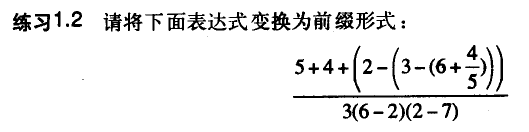

In [17]:
;前缀式最外层是最后执行的运算符，由此类推即可
;验证方法：分母为负，分子为正，符号为负
;分母为3*4*5=60,分子中含5，分母一定为300的约数
(/ (+ 5 4 (- 2 (- 3 (+ 6 (/ 4 5))))) (* 3 (- 6 2) (- 2 7)))

-37/150

In [18]:
(define (sum-of-larger-nums x y z) (cond((and (< x y) (< x z)) (+ y z)) 
                                        ((and (< y x) (< y z)) (+ x z))
                                        (else (+ x y))))

In [20]:
(sum-of-larger-nums 3 2 1)

5

In [21]:
(sum-of-larger-nums 3 3 1)

6

In [22]:
(sum-of-larger-nums 3 1 1)

4

In [23]:
(sum-of-larger-nums 3 3 3)

6

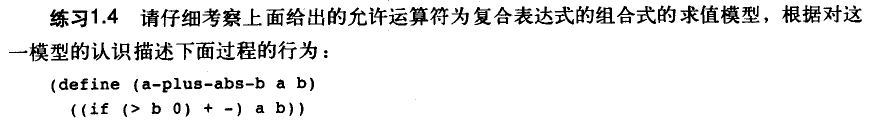

In [24]:
;这个过程表示 a+|b|，特别之处在于if返回的是一个运算符，而非一个数字。
;这反映了运算符也可以作为表达式去使用

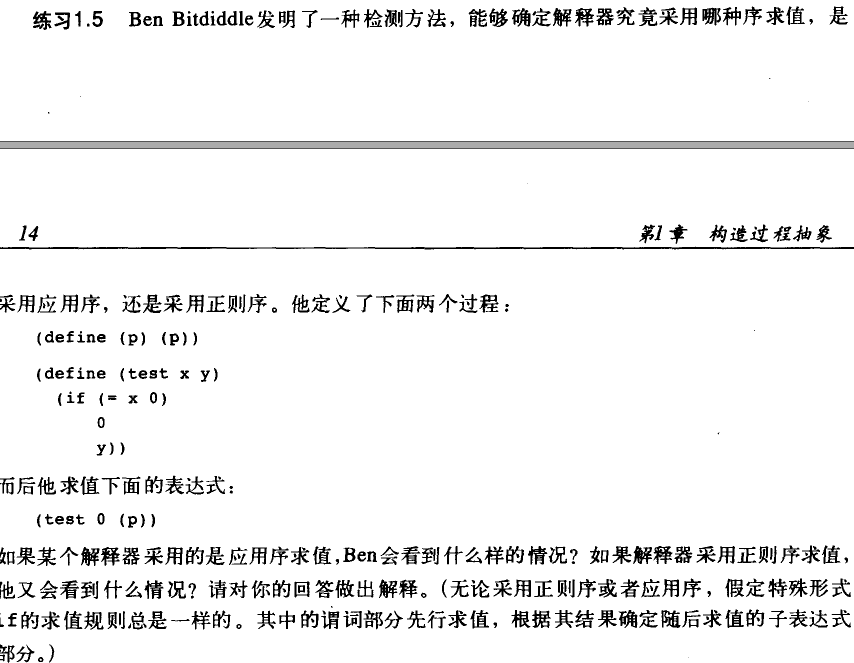

In [ ]:
;应用序：即从内而外，先将最内层的表达式求解，再代入外层
(test 0 (p))
;1 将p进行替换，返回p本身
;2 不断重复上述过程，最终堆栈溢出

;正则序：即从外而内，把外层的复合过程分解成最简单的组合式
(test 0 (p))
;1 将test替换
(if (= 0 0) 0 (p))
;2 结果为0

In [26]:
;检查：已知schema为应用序，那么其结果应该为第一种
(define (p)(p))
(define (test x y)(if (= x 0) 0 y))
(test 0 p)

0

In [27]:
(define (p)(p))
p

#<procedure>

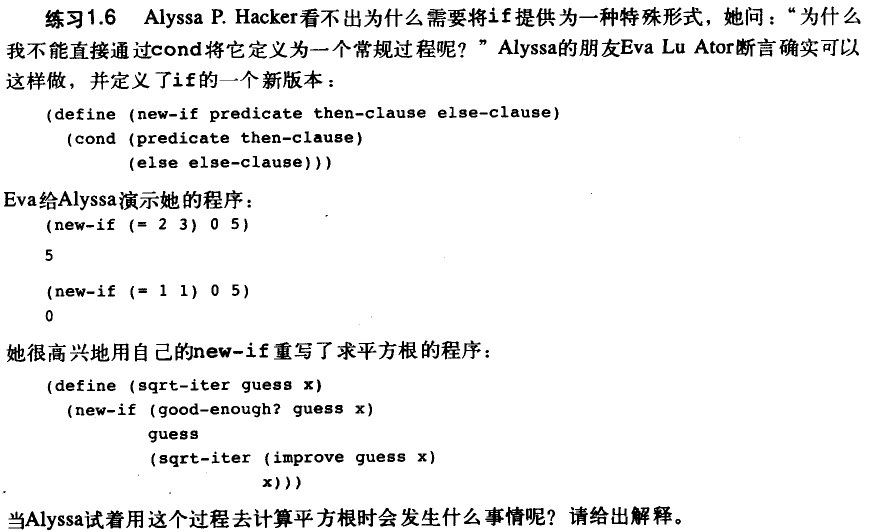

In [29]:
;初步理解：用这个过程去计算时，schema的应用序特性会使得它先去试图计算
;sqrt-iter (improve guess x),后者嵌套了new-if,从而继续产生计算，导致堆栈溢出
;运行下边的代码块，如果发现停不下来，则符合预期

In [3]:
;实际测试
(define (new-if predicate then-clause else-clause)(cond (predicate then-clause)(else else-clause)))
(define (abs x) (if (< x 0) (- x) x))
(define (square x) (* x x))
(define (good-enough? guess x) (< (abs (- (square guess) x)) 0.001))
(define (improve guess x)(/ (+ guess (/ x guess)) 2))
(define (sqrt-iter-old guess x)(if (good-enough? guess x) guess (sqrt-iter-old (improve guess x) x)));这是为了证明上边写的没问题
(sqrt-iter-old 1.0 4)
(define (sqrt-iter guess x)(new-if (good-enough? guess x) guess (sqrt-iter (improve guess x) x)));
(sqrt-iter 1.0 4)


Traceback (most recent call last):
  File "In [3]", line 10, col 1, in 'sqrt-iter'
  File "In [3]", line 9, col 65, in 'sqrt-iter'
  File "In [3]", line 9, col 65, in 'sqrt-iter'
  File "In [3]", line 9, col 65, in 'sqrt-iter'
  File "In [3]", line 9, col 65, in 'sqrt-iter'
  File "In [3]", line 9, col 65, in 'sqrt-iter'
  File "In [3]", line 9, col 65, in 'sqrt-iter'
  File "In [3]", line 9, col 65, in 'sqrt-iter'
  File "In [3]", line 9, col 65, in 'sqrt-iter'
  File "In [3]", line 9, col 65, in 'sqrt-iter'
  File "In [3]", line 9, col 65, in 'sqrt-iter'
  File "In [3]", line 9, col 65, in 'sqrt-iter'
  File "In [3]", line 9, col 65, in 'sqrt-iter'
  File "In [3]", line 9, col 65, in 'sqrt-iter'
  File "In [3]", line 9, col 65, in 'sqrt-iter'
  File "In [3]", line 9, col 65, in 'sqrt-iter'
  File "In [3]", line 9, col 65, in 'sqrt-iter'
  File "In [3]", line 9, col 65, in 'sqrt-iter'
  File "In [3]", line 9, col 65, in 'sqrt-iter'
  File "In [3]", line 9, col 65, in 'sqrt-iter'
  Fi

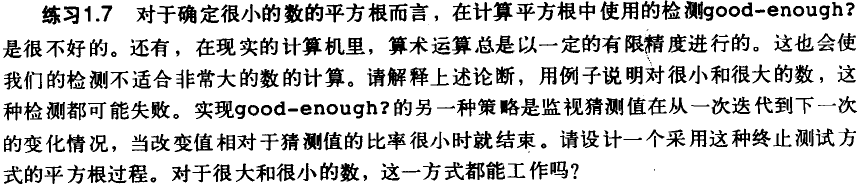

In [4]:
;对很小的数，这个结论很直观，因为如果数本身就远小于阈值，那么使用阈值进行限制的意义不大。比如阈值=10^-2，而数=10^-4
;对很大的数，如达到2^60次方及以上的数，他们的浮点表示精度将不能满足要求，可能导致永远无法收敛。
(define (abs x) (if (< x 0) (- x) x))
(define (square x) (* x x))
(define (good-enough? guess last-guess) (< (/ (abs (- guess last-guess)) last-guess) 0.001))
(define (improve guess x)(/ (+ guess (/ x guess)) 2))
(define (sqrt-iter-new guess last-guess x)(if (good-enough? guess last-guess) guess (sqrt-iter-new (improve guess x) guess x)))
(sqrt-iter-new 1.0 2.0 4)

2.0000000929222947

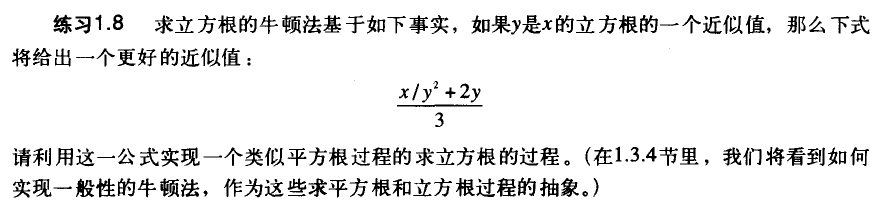

In [5]:
(define (abs x) (if (< x 0) (- x) x))
(define (square x) (* x x))
(define (good-enough? guess last-guess) (< (/ (abs (- guess last-guess)) last-guess) 0.001))
(define (improve guess x)(/ (+ (* 2 guess) (/ x (square guess))) 3))
(define (cube-root guess last-guess x)(if (good-enough? guess last-guess) guess (cube-root (improve guess x) guess x)))
(sqrt-iter-new 1.0 2.0 27)

3.0000005410641766

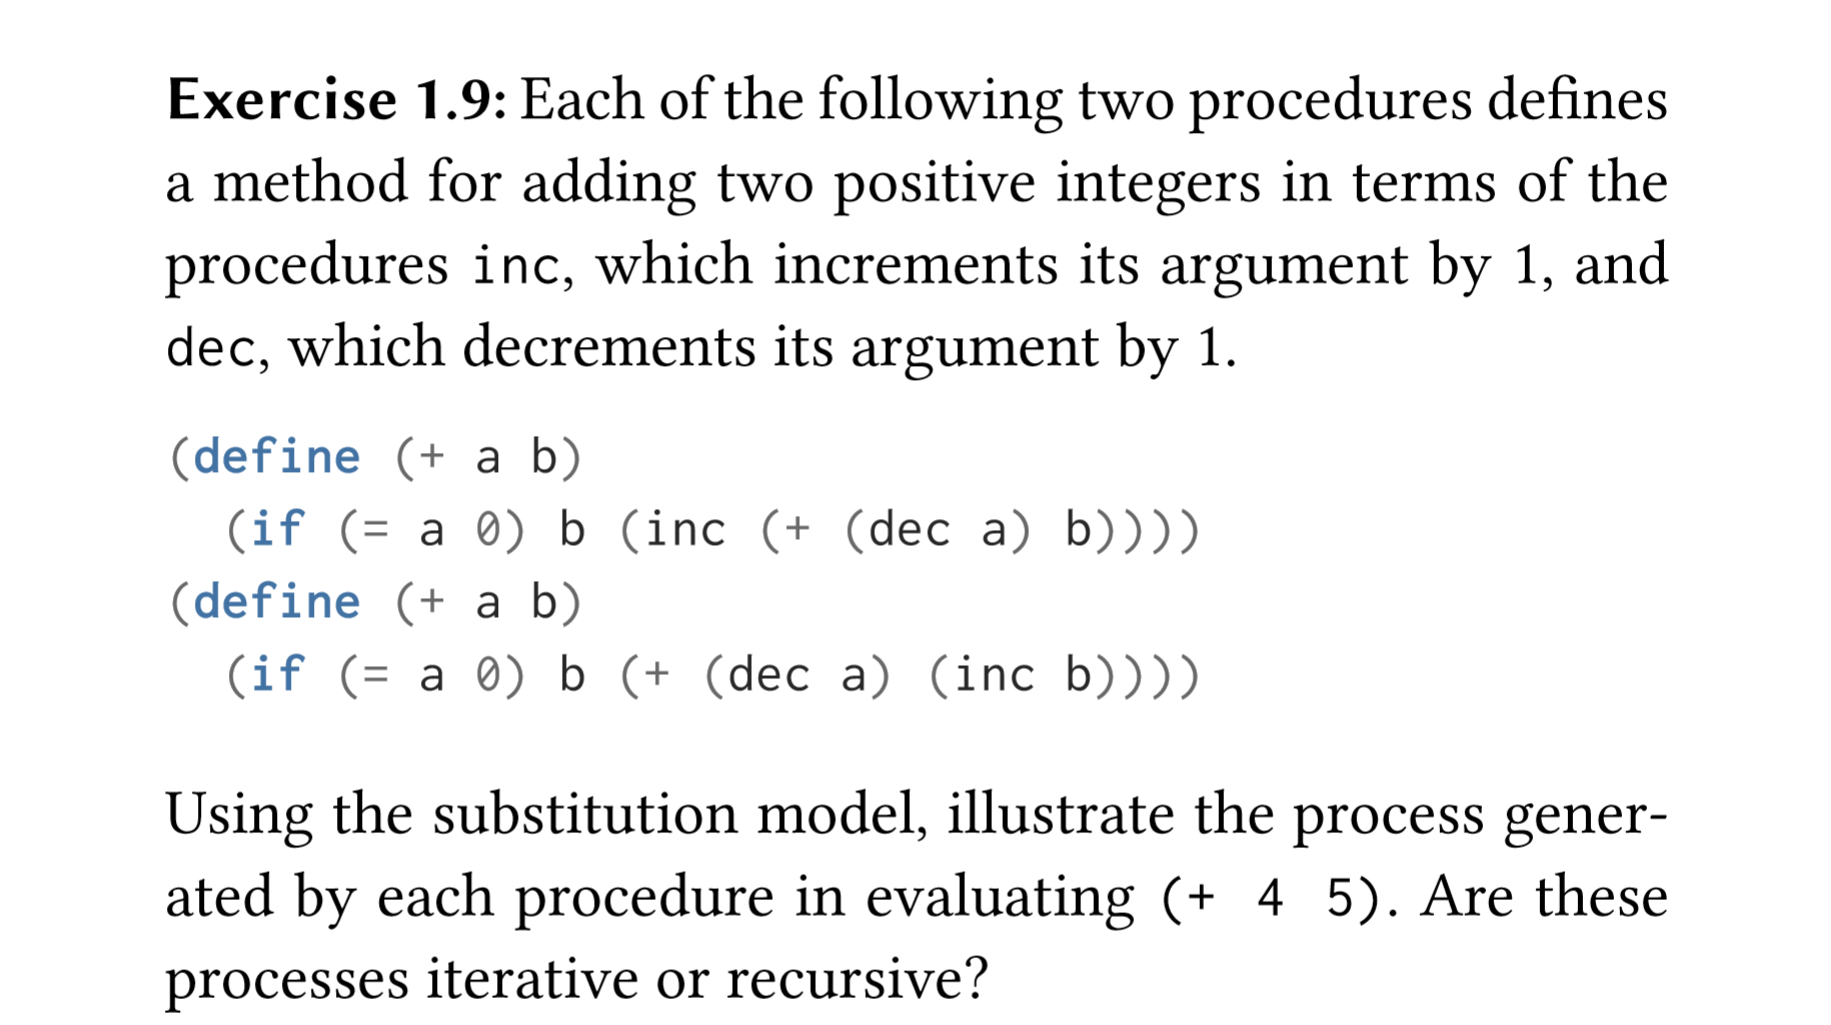


In [1]:
; for upper procedure:
(inc (+ 4 5))
(inc (inc (+ 3 5)))
(inc (inc (inc (+ 2 5))))
(inc (inc (inc (inc (+ 1 5)))))
(inc (inc (inc (inc (inc (+ 0 5))))))
(inc (inc (inc (inc (inc 5)))))
(inc (inc (inc (inc 6))))
(inc (inc (inc 7)))
(inc (inc 8))
(inc 9)
10
; a recursive processes, as it needs to keep the history routes

; for latter procedure:
(+ 4 6)
(+ 3 7)
(+ 2 8)
(+ 1 9)
(+ 0 10)
10
; a iterative, as it just need to keep history states


Traceback (most recent call last):
  File "In [1]", line 2, col 2
RunTimeError: unbound variable 'inc'



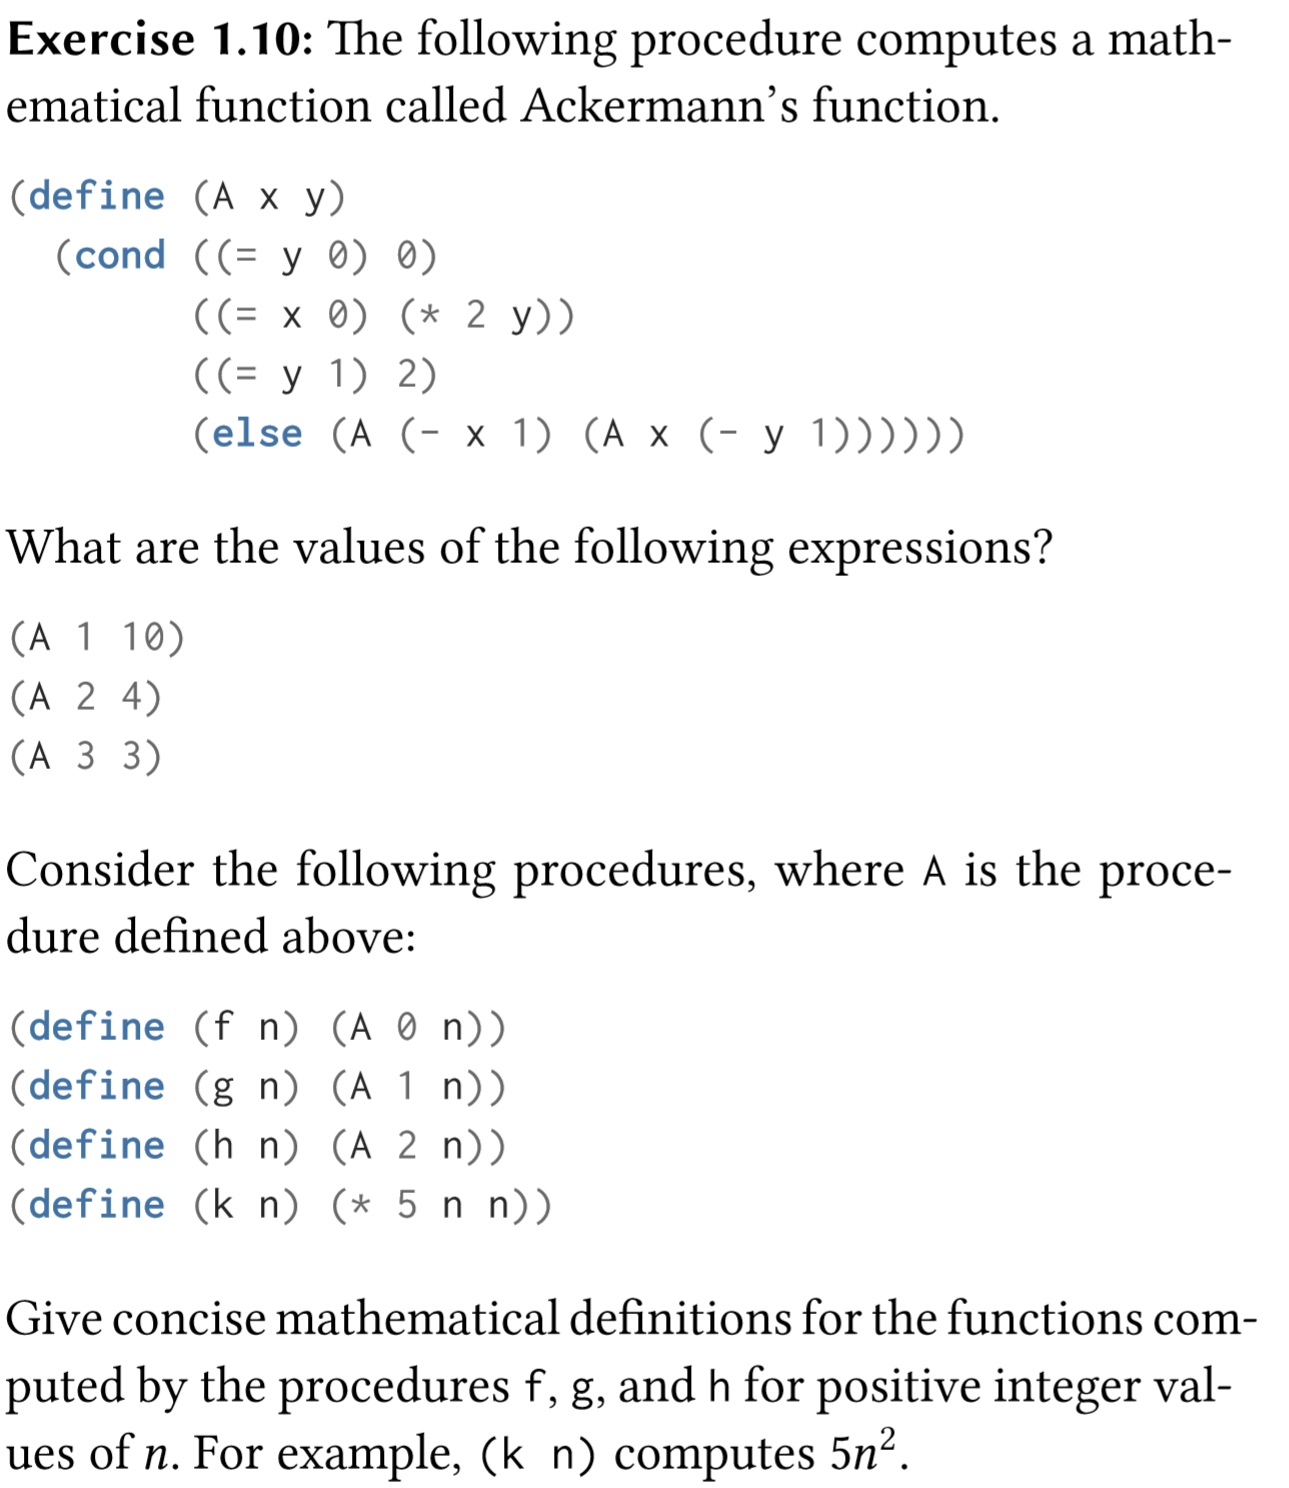

In [2]:
(define (A x y) (cond ((= y 0) 0) ((= x 0) (* 2 y)) ((= y 1) 2) (else (A (- x 1) (A x (- y 1))))))
(A 1 10)
;(A 1 10)
;(A(0 A(1 9)))
;(* 2 A(1 9))
;...
;2^10 = 1024
(A 2 4)
;(A 1 (A 2 3))
;(A 1 (A 1 (A 2 2)))
;(A 1 (A 1 (A 1 (A 2 1))))
;(A 1 (A 1 (A 1 2)))
;(A 1 (A 1 (A 0 (A 1 ))))

1024